## Análisis Exploratorio De Datos
*Los siguientes datos serán analizados para evaluar el comportamiento de la información**

### Se importan la librerías que se utilizarán

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import warnings
# Ignorar todos los warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Se almancenan los datos en dataframes
### Se usará el archivo "Datasets Empresa.xlsx". Al tener varias hojas de excel, se crearán varios dataframes diferentes

In [2]:
data_ventas = pd.read_excel("Datasets Empresa.xlsx", sheet_name = "VENTAS")
data_clientes = pd.read_excel("Datasets Empresa.xlsx", sheet_name = "CLIENTES")
data_ubicaciones = pd.read_excel("Datasets Empresa.xlsx", sheet_name = "UBICACIONES")
data_cobros = pd.read_excel("Datasets Empresa.xlsx", sheet_name = "COBROS")
data_aux = pd.read_excel("Datasets Empresa.xlsx", sheet_name = "AUX")

## Primero analicemos la tabla de ventas
### Para esto, daremos un vistazo con el fin de tener una idea acerca de los datos que trataremos

In [3]:
data_ventas.head()

,Unnamed: 0,NroFactura,FechaFactura,Cliente,MontoSinImp,Impuestos,MontoFactura
0,NaN,1,2014-01-03,Semillas Santo Mongo,765.68,203.53,969.21
1,NaN,2,2014-01-03,Buffalo Cnia,420.60,111.80,532.40
2,NaN,3,2014-01-03,Englewood Cnia,108.98,28.96,137.94
3,NaN,4,2014-01-04,"Ross, Christian",304.94,81.05,385.99
4,NaN,5,2014-01-04,"Diaz, Gabriel",107.07,28.45,135.52


In [4]:
print(f"La tabla de ventas contiene {data_ventas.shape[0]} registros y {data_ventas.shape[1]} variables")

La tabla de ventas contiene 4407 registros y 7 variables


In [5]:
data_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    0 non-null      float64       
 1   NroFactura    4407 non-null   int64         
 2   FechaFactura  4407 non-null   datetime64[ns]
 3   Cliente       4407 non-null   object        
 4   MontoSinImp   4407 non-null   float64       
 5   Impuestos     4407 non-null   float64       
 6   MontoFactura  4407 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 241.1+ KB


### El tipo de dato de las variables parece estar correcto
### Ahora, buscaremos registros duplicados y faltantes

In [6]:
duplicados = data_ventas.duplicated().sum() 
porcentaje_duplicados = (duplicados * 100) / len(data_ventas)
print(f"Hay {duplicados} registros duplicados\nEquivale al {porcentaje_duplicados}% de los datos")

Hay 0 registros duplicados
Equivale al 0.0% de los datos


In [7]:
catn_nulos = data_ventas.isnull().sum().sum()
porcentaje_nulos = (catn_nulos * 100) / len(data_ventas)
print(f"Hay {catn_nulos} registros con valores nulos\nEquivale al {round(porcentaje_nulos, 1)}% de los datos")

Hay 4407 registros con valores nulos
Equivale al 100.0% de los datos


In [8]:
nulos = pd.concat([data_ventas.isnull().sum(), 100 * data_ventas.isnull().mean()], axis = 1)
nulos.columns = ["cantidad", "%"]
nulos.sort_values(by = "%", ascending = False)

,cantidad,%
Unnamed: 0,4407,100.0
NroFactura,0,0.0
FechaFactura,0,0.0
Cliente,0,0.0
MontoSinImp,0,0.0
Impuestos,0,0.0
MontoFactura,0,0.0


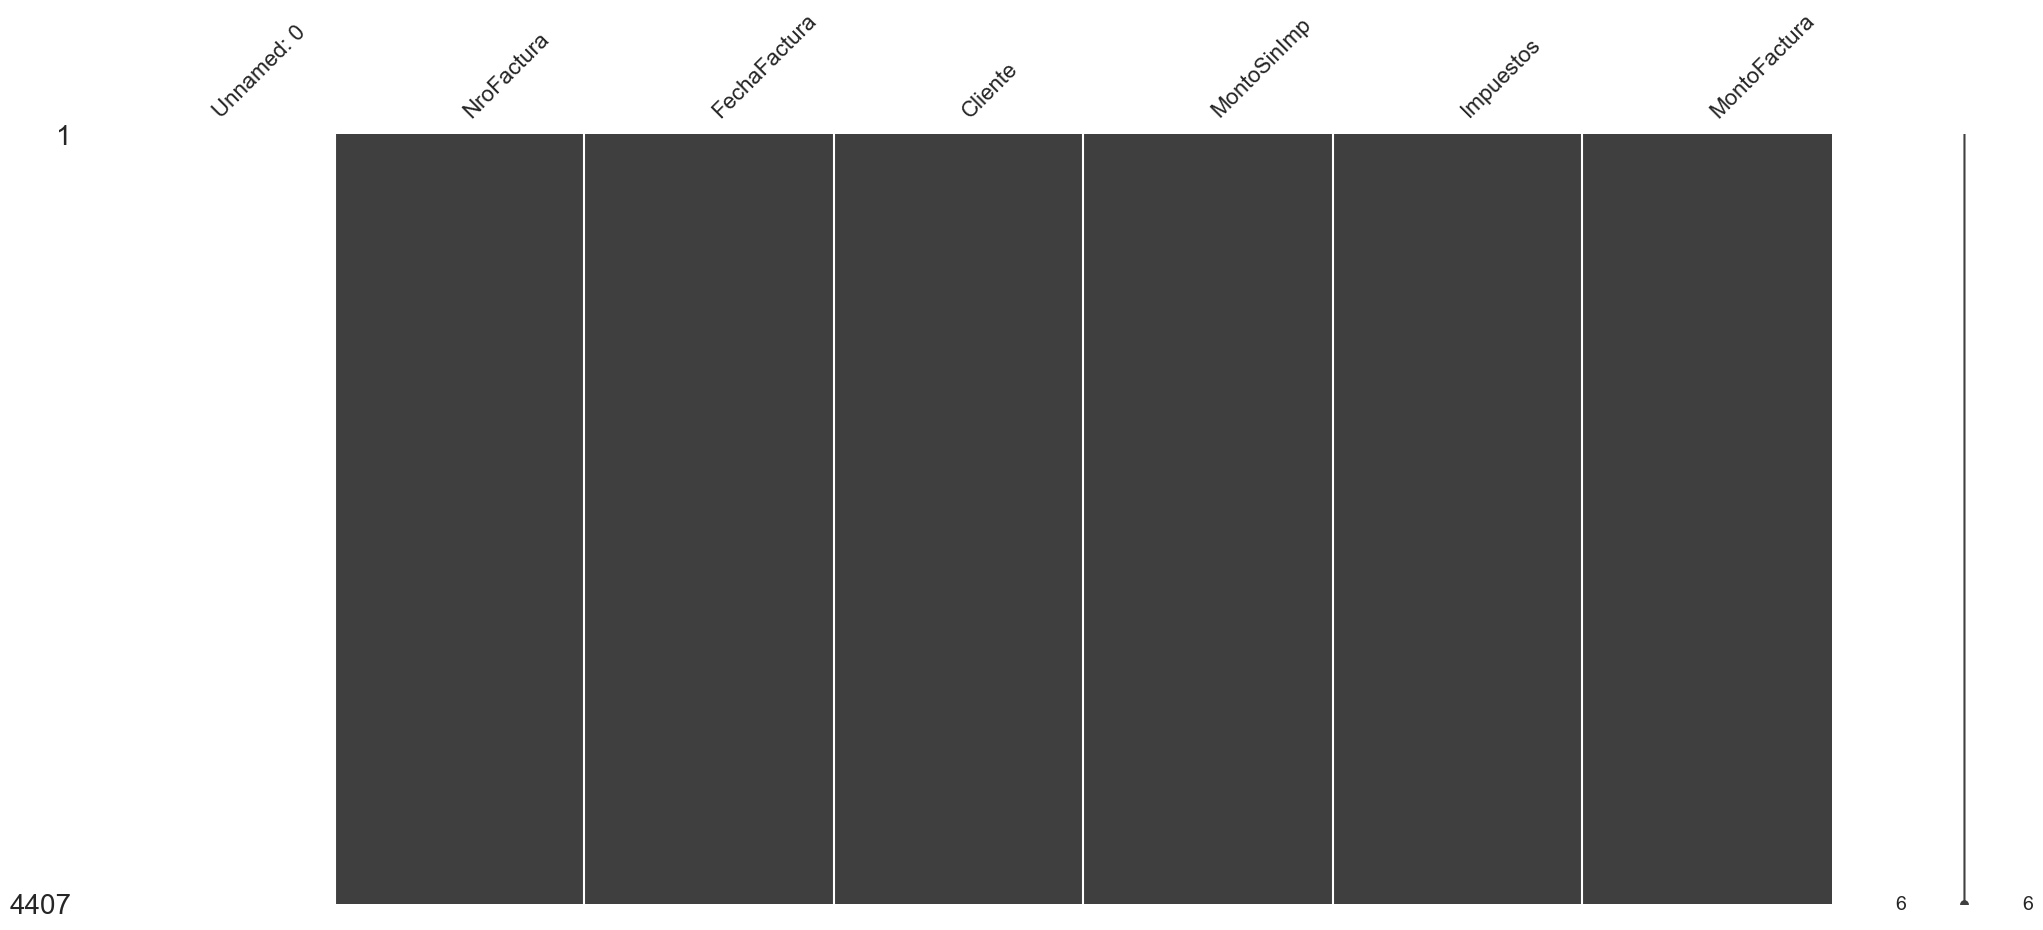

In [9]:
msno.matrix(data_ventas)
plt.show()

### Podemos ver que la columna "Unnamed: 0" posee todos sus registros nulos. Esto se debe a que es una columna agregada arbitrariamente en el excel para darle márgen a los datos, por ende, no se tendrá en cuenta

In [10]:
data_ventas = data_ventas.drop(columns = "Unnamed: 0")

## Pasemos a analizar cada columna
## NroFactura
### Confirmamos que no haya ningún número de factura repetido

In [11]:
cant_nrofact = data_ventas["NroFactura"].value_counts().max()
print(f"La mayor cantidad de veces que se repite un número de facturas es: {cant_nrofact}")

La mayor cantidad de veces que se repite un número de facturas es: 1


### Veamos el rango de número de factura

In [17]:
nrofact_min = data_ventas["NroFactura"].min()
nrofact_max = data_ventas["NroFactura"].max()
print(f"El rango de número de factura va desde {nrofact_min} hasta {nrofact_max}")

El rango de número de factura va desde 1 hasta 4407


## FechaFactura

In [18]:
fechafact_min = data_ventas["FechaFactura"].min()
fechafact_max = data_ventas["FechaFactura"].max()
periodo = fechafact_max - fechafact_min
print(f"El rango de fecha de factura va desde {fechafact_min} hasta {fechafact_max}")
print(f"Los datos de las ventas abarcan un periodo de {periodo.days} dias")

El rango de fecha de factura va desde 2014-01-03 00:00:00 hasta 2017-03-31 00:00:00
Los datos de las ventas abarcan un periodo de 1183 dias


## Cliente

In [14]:
data_ventas["Cliente"].value_counts()

Johnson, Benjamin       60
Semillas Santo Mongo    56
South Portland Cnia     53
Mitchell, Connor        49
Perez, Jeremy           49
                        ..
Kiela Cnia              32
Madridia Cnia           32
Leo Seguros             31
Arthur, Jermaine        31
Rodolfo, Chavez         29
Name: Cliente, Length: 107, dtype: int64

### A simple vista no se ven errores en los nombres de los clientes
## MontoSinImp

In [24]:
mntsinimp_min = data_ventas["MontoSinImp"].min()
mntsinimp_max = data_ventas["MontoSinImp"].max()
print(f"El rango de montos sin impuestos va desde {mntsinimp_min} hasta {mntsinimp_max}")

El rango de montos sin impuestos va desde 95.59 hasta 100000.0


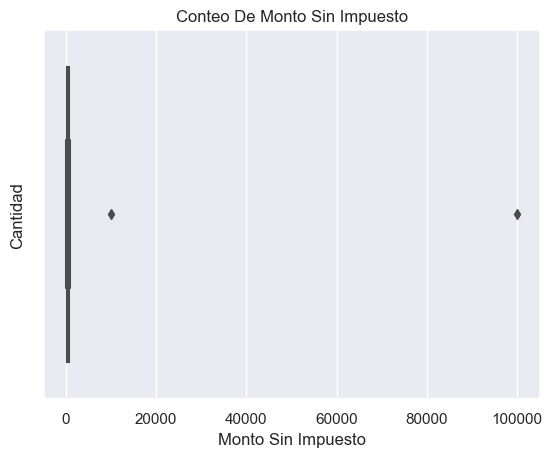

In [20]:
sns.boxplot(x = data_ventas["MontoSinImp"], color = "b")
plt.xlabel("Monto Sin Impuesto")
plt.ylabel("Cantidad")
plt.title("Conteo De Monto Sin Impuesto")
plt.show()

### Analicemos este valor atípico

In [21]:
df_mntsinimp = pd.DataFrame(data_ventas["MontoSinImp"])
df_mntsinimp.sort_values(by = "MontoSinImp", ascending = False).head(10)

,MontoSinImp
4406,100000.00
4405,10000.00
4403,1000.00
4317,896.00
4378,895.00
4355,894.00
4370,880.00
4319,871.00
4369,864.00
1720,860.31


### Veamos los registros de los valores más altos

In [22]:
mayores_mntsinimp = df_mntsinimp["MontoSinImp"].nlargest(3).tolist()
data_ventas[data_ventas["MontoSinImp"].isin(mayores_mntsinimp)]

,NroFactura,FechaFactura,Cliente,MontoSinImp,Impuestos,MontoFactura
4403,4404,2017-01-27,Wapato Cnia,1000.0,210.0,1210.0
4405,4406,2017-01-27,Wapato Cnia,10000.0,2100.0,12100.0
4406,4407,2017-03-31,"Adams, Fernando",100000.0,21000.0,121000.0


### A pesar de que hay valores muy altos, no parecen erróneos
## Impuestos

In [25]:
imp_min = data_ventas["Impuestos"].min()
imp_max = data_ventas["Impuestos"].max()
print(f"El rango de impuestos va desde {imp_min} hasta {imp_max}")

El rango de impuestos va desde 22.68 hasta 21000.0


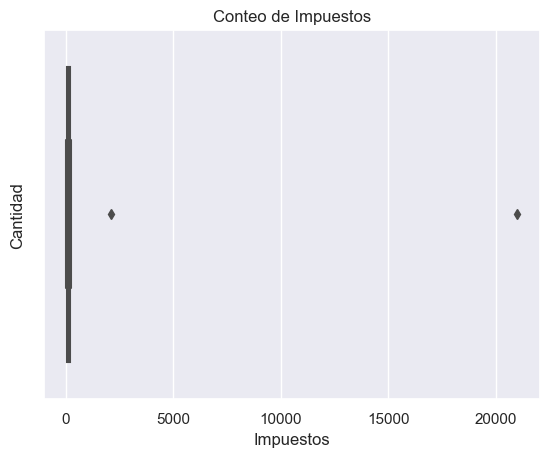

In [26]:
sns.boxplot(x = data_ventas["Impuestos"], color = "b")
plt.xlabel("Impuestos")
plt.ylabel("Cantidad")
plt.title("Conteo de Impuestos")
plt.show()

### Como ya verificamos con el análisis de montos sin impuesto, estos valores no son errores
## MontoFactura

In [27]:
mntfact_min = data_ventas["MontoFactura"].min()
mntfact_max = data_ventas["MontoFactura"].max()
print(f"El rango de montos de factura va desde {mntfact_min} hasta {mntfact_max}")

El rango de montos de factura va desde 121.0 hasta 121000.0


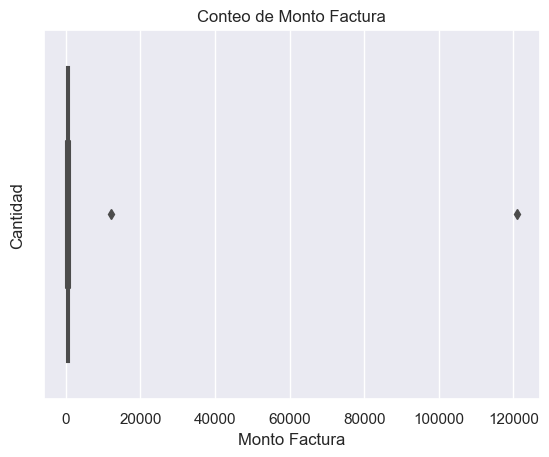

In [31]:
sns.boxplot(x = data_ventas["MontoFactura"], color = "b")
plt.xlabel("Monto Factura")
plt.ylabel("Cantidad")
plt.title("Conteo de Monto Factura")
plt.show()

### Al igual que antes, estos valores no son errores
### Podemos notar que la columna Monto Factura es calculada de la siguiente manera:
### MontoFactura = MontoSinImp + Impuestos
## Ahora pasemos a analizar la tabla de clientes

In [32]:
data_clientes.head()

,Unnamed: 0,Cliente,Tipo,Teléfono,Ubicación
0,1,"Adams, Fernando",Persona,373846615,"Miami, Estados Unidos"
1,2,"Adams, Wyatt",Persona,646775929,"Madrid, España"
2,3,"Alonso, Julio",Persona,667028591,"Buenos Aires, Argentina"
3,4,"Ana, Maria",Persona,707344341,"Córdoba, Argentina"
4,5,"Anderson, Nicholas",Persona,743415512,"La Paz, Bolivia"


In [33]:
print(f"La tabla de clientes contiene {data_clientes.shape[0]} registros y {data_clientes.shape[1]} variables")

La tabla de clientes contiene 107 registros y 5 variables


In [34]:
data_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  107 non-null    int64 
 1   Cliente     107 non-null    object
 2   Tipo        107 non-null    object
 3   Teléfono    107 non-null    int64 
 4   Ubicación   107 non-null    object
dtypes: int64(2), object(3)
memory usage: 4.3+ KB


### El tipo de dato de las variables parece estar correcto
### Vemos que no hay valores faltantes. Ahora, buscaremos registros duplicados

In [35]:
duplicados_clientes = data_clientes.duplicated().sum() 
porcentaje_duplicados_clientes = (duplicados_clientes * 100) / len(data_clientes)
print(f"Hay {duplicados_clientes} registros duplicados\nEquivale al {porcentaje_duplicados_clientes}% de los datos")

Hay 0 registros duplicados
Equivale al 0.0% de los datos


## Pasemos a analizar cada columna
## Unnamed: 0

In [37]:
data_clientes["Unnamed: 0"]

0        1
1        2
2        3
3        4
4        5
      ... 
102    103
103    104
104    105
105    106
106    107
Name: Unnamed: 0, Length: 107, dtype: int64

### Vemos que esta columna cumple el papel de índice así que se elimina ya que no será de utilidad
## Cliente

In [38]:
data_clientes["Cliente"].value_counts()

Adams, Fernando                 1
Reed, Richard                   1
Perez, Jeremy                   1
Paris Cnia                      1
Pal, Ricardo                    1
                               ..
Garcia, James                   1
Gao, Ronnie                     1
Fiorilo Transportes y Correo    1
Falmouth Cnia                   1
Zeng, Omar                      1
Name: Cliente, Length: 107, dtype: int64

### A simple vista no se ven errores en los nombres de los clientes y notamos que se cumple la relación de que podemos tener una o varias ventas al mismo CLIENTE relacionadas por la columna cliente con el nombre y apellido
## Tipo (El cliente puede ser una persona o una empresa)

In [39]:
data_clientes["Tipo"].value_counts()

Persona    66
Empresa    41
Name: Tipo, dtype: int64

## Teléfono

In [42]:
tel_min = data_clientes["Teléfono"].min()
tel_max = data_clientes["Teléfono"].max()
print(f"El rango de número de teléfono va desde {tel_min} hasta {tel_max}")

El rango de número de teléfono va desde 180874224 hasta 858418641


### Vemos que todos los números de teléfono tienen la misma cantidad de dígitos
## Ubicación

In [43]:
data_clientes["Ubicación"].value_counts()

Miami, Estados Unidos                  3
La Habana, Cuba                        3
Ciudad de México, México               3
Guayaquil, Ecuador                     3
Quito, Ecuador                         3
Bogotá, Colombia                       3
San José, Costa Rica                   3
Los Angeles, Estados Unidos            3
Monterrey, México                      3
Madrid, España                         3
Lima, Perú                             3
Barcelona, España                      3
Barranquilla, Colombia                 3
Guadalajara, México                    3
Puebla, México                         3
Caracas, Venezuela                     3
Río de Janeiro, Brasil                 3
Asunción, Paraguay                     3
New York, Estados Unidos               3
Ciudad de Guatemala, Guatemala         3
Medellín, Colombia                     3
Montevideo, Uruguay                    3
Maracaibo, Venezuela                   3
La Paz, Bolivia                        3
Córdoba, Argenti

### A simple vista no se ven errores en las ubicaciones
## Ahora pasemos a analizar la tabla de ubicaciones

In [44]:
data_ubicaciones.head()

,Unnamed: 0,Ciudad,País,Ubicación
0,NaN,Donosti,Pais Vasco,"Donosti, Pais Vasco"
1,NaN,Asunción,Paraguay,"Asunción, Paraguay"
2,NaN,Barcelona,España,"Barcelona, España"
3,NaN,Barranquilla,Colombia,"Barranquilla, Colombia"
4,NaN,Bogotá,Colombia,"Bogotá, Colombia"


In [45]:
print(f"La tabla de ubicaciones contiene {data_ubicaciones.shape[0]} registros y {data_ubicaciones.shape[1]} variables")

La tabla de ubicaciones contiene 41 registros y 4 variables


In [46]:
data_ubicaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   Ciudad      41 non-null     object 
 2   País        41 non-null     object 
 3   Ubicación   41 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.4+ KB


### El tipo de dato de las variables parece estar correcto
### Ahora buscaremos registros duplicados

In [47]:
duplicados_ubicaciones = data_ubicaciones.duplicated().sum() 
porcentaje_duplicados_ubicaciones = (duplicados_ubicaciones * 100) / len(data_ubicaciones)
print(f"Hay {duplicados_ubicaciones} registros duplicados\nEquivale al {porcentaje_duplicados_ubicaciones}% de los datos")

Hay 0 registros duplicados
Equivale al 0.0% de los datos


### Al igual que en la tabla de ventas, la columna "Unnamed: 0" será eliminada

In [48]:
data_ubicaciones = data_ubicaciones.drop(columns = "Unnamed: 0")

## Pasemos a analizar cada columna
## Ciudad

In [50]:
data_ubicaciones["Ciudad"].value_counts()

Valencia                   2
Asunción                   1
Montevideo                 1
New York                   1
Puebla                     1
Quito                      1
Río de Janeiro             1
San José                   1
San Juan                   1
San Salvador               1
Santa Cruz de la Sierra    1
Santiago de Cali           1
Santiago                   1
Santo Domingo              1
São Paulo                  1
Sevilla                    1
Tegucigalpa                1
Toluca                     1
Trujillo                   1
Monterrey                  1
Donosti                    1
Medellín                   1
Córdoba                    1
Barcelona                  1
Barranquilla               1
Bogotá                     1
Buenos Aires               1
Caracas                    1
Ciudad de Guatemala        1
Ciudad de México           1
Guadalajara                1
Maracaibo                  1
Guayaquil                  1
La Habana                  1
La Paz        

### A simple vista no se ven errores en las ciudades
## País

In [51]:
data_ubicaciones["País"].value_counts()

México                  5
España                  4
Colombia                4
Venezuela               3
Estados Unidos          3
Perú                    2
Brasil                  2
Argentina               2
Ecuador                 2
Bolivia                 2
República Dominicana    1
Chile                   1
El Salvador             1
Puerto Rico             1
Costa Rica              1
Pais Vasco              1
Uruguay                 1
Nicaragua               1
Paraguay                1
Cuba                    1
Guatemala               1
Honduras                1
Name: País, dtype: int64

### A simple vista no se ven errores en los países
## Ubicación (La columna ubicación nos permite conocer la ciudad y país del cliente)

In [52]:
data_ubicaciones["Ubicación"].value_counts()

Donosti, Pais Vasco                    1
Monterrey, México                      1
New York, Estados Unidos               1
Puebla, México                         1
Quito, Ecuador                         1
Río de Janeiro, Brasil                 1
San José, Costa Rica                   1
San Juan, Puerto Rico                  1
San Salvador, El Salvador              1
Santa Cruz de la Sierra, Bolivia       1
Santiago de Cali, Colombia             1
Santiago, Chile                        1
Santo Domingo, República Dominicana    1
São Paulo, Brasil                      1
Sevilla, España                        1
Tegucigalpa, Honduras                  1
Toluca, México                         1
Trujillo, Perú                         1
Valencia, España                       1
Montevideo, Uruguay                    1
Miami, Estados Unidos                  1
Asunción, Paraguay                     1
Medellín, Colombia                     1
Barcelona, España                      1
Barranquilla, Co

### A simple vista no se ven errores en las ubicaciones y podemos notar que esta columna relaciona la tabla Ubicaciones con la tabla Clientes
## Ahora pasemos a analizar la tabla de Cobros

In [53]:
data_cobros.head()

,Unnamed: 0,NroFactura,FechaCobro,MontoCobrado
0,NaN,1,2014-01-19,106.61
1,NaN,1,2014-01-12,862.60
2,NaN,2,2014-01-16,95.83
3,NaN,2,2014-01-10,436.57
4,NaN,3,2014-01-27,22.07


In [54]:
print(f"La tabla de cobros contiene {data_cobros.shape[0]} registros y {data_cobros.shape[1]} variables")

La tabla de cobros contiene 8510 registros y 4 variables


In [55]:
data_cobros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8510 entries, 0 to 8509
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    0 non-null      float64       
 1   NroFactura    8510 non-null   int64         
 2   FechaCobro    8510 non-null   datetime64[ns]
 3   MontoCobrado  8510 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 266.1 KB


### El tipo de dato de las variables parece estar correcto
### Ahora buscaremos registros duplicados

In [56]:
duplicados_cobros = data_cobros.duplicated().sum() 
porcentaje_duplicados_cobros = (duplicados_cobros * 100) / len(data_cobros)
print(f"Hay {duplicados_cobros} registros duplicados\nEquivale al {porcentaje_duplicados_cobros}% de los datos")

Hay 0 registros duplicados
Equivale al 0.0% de los datos


### Al igual que antes, la columna "Unnamed: 0" será eliminada

In [58]:
data_cobros = data_cobros.drop(columns = "Unnamed: 0")

## Pasemos a analizar cada columna
## NroFactura
### Veamos la máxima cantidad de veces que se repite un número de factura

In [62]:
cant_nrofact_cobros = data_cobros["NroFactura"].value_counts().max()
print(f"La mayor cantidad de veces que se repite un número de facturas es: {cant_nrofact_cobros}")

La mayor cantidad de veces que se repite un número de facturas es: 2


### Esto se debe a que está relacionado con las VENTAS por el NroFactura, una venta puede fraccionarse en varios cobros
## FechaCobro

In [67]:
fechacobro_min = data_cobros["FechaCobro"].min()
fechacobro_max = data_cobros["FechaCobro"].max()
periodo_cobro = fechacobro_max - fechacobro_min
print(f"El rango de fecha de cobros va desde {fechacobro_min} hasta {fechacobro_max}")
print(f"Los datos de los cobros abarcan un periodo de {periodo_cobro.days} dias")

El rango de fecha de cobros va desde 2014-01-10 00:00:00 hasta 2016-11-30 00:00:00
Los datos de los cobros abarcan un periodo de 1055 dias


## MontoCobrado

In [69]:
mntcobro_min = data_cobros["MontoCobrado"].min()
mntcobro_max = data_cobros["MontoCobrado"].max()
print(f"El rango de cobros de factura va desde {mntcobro_min} hasta {mntcobro_max}")

El rango de cobros de factura va desde 0.0 hasta 1089.0


### ¿Es posible que se cobre un monto por un valor de 0? Esta información deberá ser verificada con el proveedor de los datos
## Por último pasemos a analizar la tabla Aux

In [74]:
data_aux.head()

,Tipo
0,Empresa
1,Persona


In [75]:
data_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tipo    2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


### Esta tabla solo contiene la información del tipo de cliente y está relacionada con la tabla Clientes
### Con esto, conocemos el contexto en el que estamos trabajando y tenemos la información suficiente para desarrollar el reporte en Power BI